In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
telco_data=pd.read_csv('telcodata.csv',index_col=0)

## EDA 

In [4]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [6]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.0, 'Churn Distribution')

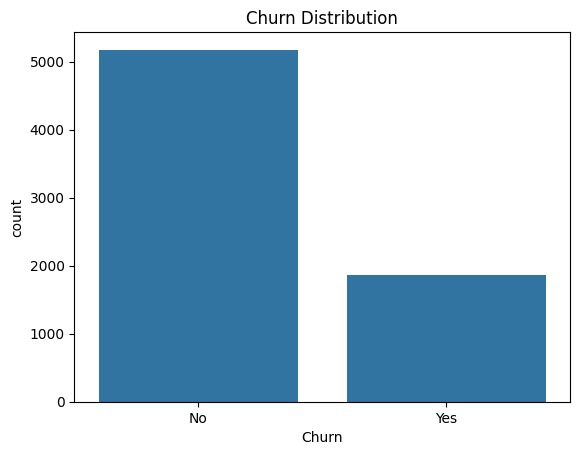

In [7]:
# Visualize the Target Variable Distribution
sns.countplot(x=telco_data['Churn'])
plt.title('Churn Distribution')

In [ ]:
# Check for imbalance in target variable
counts=telco_data['Churn'].value_counts(normalize=True)*100
print(counts)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


Churn

-No     5174  = 73.5%   (Majority Class)    
-Yes    1869  = 26.5%   (Minority Class)

In [9]:
# Imbalance Ratio
majority = counts.max()
minority = counts.min()
imbalance_ratio = majority/minority
if imbalance_ratio>10:
   print("Severe imbalance")
elif imbalance_ratio > 3:
    print("High imbalance")
elif imbalance_ratio > 1.5:
    print("Mild imbalance")
else:
    print("Balanced dataset")

Mild imbalance


In [10]:
# Creating a dataframe to get the percentage of misssing values
missing_values = pd.DataFrame(telco_data.isnull().sum(), columns=['Missing Values'])
missing_values['Percentage'] = (missing_values['Missing Values'] / len(telco_data)) * 100
print(missing_values)

                  Missing Values  Percentage
gender                         0         0.0
SeniorCitizen                  0         0.0
Partner                        0         0.0
Dependents                     0         0.0
tenure                         0         0.0
PhoneService                   0         0.0
MultipleLines                  0         0.0
InternetService                0         0.0
OnlineSecurity                 0         0.0
OnlineBackup                   0         0.0
DeviceProtection               0         0.0
TechSupport                    0         0.0
StreamingTV                    0         0.0
StreamingMovies                0         0.0
Contract                       0         0.0
PaperlessBilling               0         0.0
PaymentMethod                  0         0.0
MonthlyCharges                 0         0.0
TotalCharges                   0         0.0
Churn                          0         0.0


In [11]:
telco_data=telco_data.copy()

In [12]:
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges,errors='coerce')  # coerce errors to NaN
telco_data.isnull().sum()  # checking for null values after conversion

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
telco_data.loc[telco_data['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [18]:
# Removing missing values
telco_data.dropna(how='any', inplace=True)  # drop any rows with missing values
telco_data.info()  # checking the info after removing missing values

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [ ]:
# Group tenure into bins of 12 months
print(telco_data['tenure'].max())  # checking the max tenure

np.int64(72)

In [31]:
# Create bins (0 to 72 with step of 12)
bins = list(range(0, 73, 12))  # [0, 12, 24, 36, 48, 60, 72]

# Adjust the last bin to include the maximum tenure
bins[-1] = 73  

labels = [
    "0–12",
    "13–24",
    "25–36",
    "37–48",
    "49–60",
    "61–72"
]

telco_data["tenure_group"] = pd.cut(
    telco_data["tenure"],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

In [ ]:
# New tenure_group column value counts
telco_data['tenure_group'].value_counts().sort_index()

tenure_group
0–12     2175
13–24    1024
25–36     832
37–48     762
49–60     832
61–72    1407
Name: count, dtype: int64